In [1]:
import random
import numpy
import matplotlib.pyplot as plt
from tabulate import tabulate
import scipy.optimize as optimize
from decimal import Decimal

## 1. One dimensional methods

### Defining the methods

#### Exhaustive Search

In [159]:
def min_exhaustive_search(fun,a,b,error):
    n=round((b-a)/error)
    min_fun=100000
    min_x=0
    for k in range (n+1):
        x= a + k * (b-a)/n
        fun_x=fun(x)
        if (fun_x < min_fun): #searching for the minimum value of function
            min_x=x
            min_fun=fun_x
    return min_x, abs(min_x-error),min_x +error, min_fun ,n
    '''returning :
    -value of x that yeilds min value of function 
    -minimum possible value of x that yeilds min value of function according to the accepted error 
    -maximum possible value of x that yeilds min value of function according to the accepted error 
    - the minimum found value of th fuction
    - num of iteration = num of function calculations'''
# num of f calculations = number of iteratioins = n

#### Dichotomy

In [57]:
# delta most be declared before calling the function. delta = random.uniform(0, error)
def min_dichotomy (fun,a,b,error,delta,num_iter,num_fun):
    num_iter+=1     #calculate the number of iterations
    if (abs(a-b)<error):
        return a,b,num_fun,num_iter
    else:
        x1= ((a+b-delta)/2)
        x2=((a+b+delta)/2)
        num_fun+=1           #calculate the number of function calculations
        if(fun(x1)<fun(x2)):
            b=x2
        else:
            a=x1
        return min_dichotomy (fun,a,b,error,delta,num_fun,num_iter)

# to call this function min_dichotomy(fun,a,b,error,delta,0,0)

#### Golden section search

In [65]:
def min_golden (fun,a,b,error,x1,x2,fun_value,label,num_iter,num_fun):
    num_iter+=1                         #saving the number of total iteration of the function min_golden
    if (abs(b-a)<error):
        result=[a,b,num_fun,num_iter]
        return result
    else:
        if (label=='both'):   # this case will be true when first call the function, then in next stages will be either of the two following (elif)
            x1= (a+((3-math.sqrt(5))/2)*(b-a))
            x2=(b+((math.sqrt(5)-3)/2)*(b-a))
            fun_x1=fun(x1)
            fun_x2=fun(x2)
            num_fun+=2                  #saving the number of calculating of the function
        elif (label=='right'):  # this case will be true when we are moving our calculations to the right
            x2=(b+((math.sqrt(5)-3)/2)*(b-a))
            fun_x1=fun_value
            fun_x2=fun(x2)
            num_fun+=1                  #saving the number of calculating of the function
        elif (label=='left'):    # this case will be true when we are moving our calculations to the left
            x1= (a+((3-math.sqrt(5))/2)*(b-a))
            fun_x1=fun(x1)
            fun_x2=fun_value
            num_fun+=1                  #saving the number of calculating of the function
        #After calculating x1,x2,fun_x1,fun_x2 in previous lines, 
        # next according to the condition we will decide to recall the function to the right or left range.
        if(fun_x1<fun_x2):
            b=x1
            x2=x1
            return min_golden (fun,a,b,error,x1,x2,fun_x1,'left',num_iter,num_fun)
        else:
            a=x1
            x1=x2
            return min_golden (fun,a,b,error,x1,x2,fun_x2,'right',num_iter,num_fun)
# to call this function min_golden(fun,a,b,error,0,0,0,'both',0,0)


### Defining the functions

In [59]:
def cube_power(x):
    return pow(x,3)

In [17]:
def abs_function(x):
    return (abs(x-0.2)) 

In [18]:
def sin_function(x):
    return(x*math.sin(1/x))

### Applying the methods for the functions

In [61]:
#First function
min_x, a,b, min_fun ,n =min_exhaustive_search(cube_power,0,1,0.001) # applying first method
parameters=[]
parameters.append([a,b, n ,n])                                   # saving the result from the first method
delta = random.uniform(0, 0.001)                                    #declaring delta to be used in second method
parameters.append(min_dichotomy(cube_power,0,1,0.001,delta,0,0))    #applying 2nd method and saving the result
parameters.append(min_golden(cube_power,0,1,0.001,0,0,0,'both',0,0)) #applying the third method and saving the results
# Printing a table with results
rowIDs=['Exhaustive','Dichotomy','Golden section']
print(tabulate(parameters, headers=['a','b','function claculation','num of iteration'],  tablefmt='fancy_grid',numalign ='center',showindex=rowIDs))

╒════════════════╤═══════╤═════════════╤════════════════════════╤════════════════════╕
│                │   a   │      b      │  function claculation  │  num of iteration  │
╞════════════════╪═══════╪═════════════╪════════════════════════╪════════════════════╡
│ Exhaustive     │ 0.001 │    0.001    │          1000          │        1000        │
├────────────────┼───────┼─────────────┼────────────────────────┼────────────────────┤
│ Dichotomy      │   0   │ 0.000866204 │           13           │         12         │
├────────────────┼───────┼─────────────┼────────────────────────┼────────────────────┤
│ Golden section │   0   │ 0.000453104 │           9            │         9          │
╘════════════════╧═══════╧═════════════╧════════════════════════╧════════════════════╛


In [ ]:
parameters_linear=[]               # defining array to save the results

In [62]:
#Second function
min_x, a,b, min_fun ,n =min_exhaustive_search(abs_function,0,1,0.001) # applying first method
parameters_2=[]
parameters_2.append([a,b, n ,n])                                   # saving the result from the first method
delta = random.uniform(0, 0.001)                                    #declaring delta to be used in second method
parameters_2.append(min_dichotomy(abs_function,0,1,0.001,delta,0,0))    #applying 2nd method and saving the result
parameters_2.append(min_golden(abs_function,0,1,0.001,0,0,0,'both',0,0)) #applying the third method and saving the results
# Printing a table with results
rowIDs=['Exhaustive','Dichotomy','Golden section']
print(tabulate(parameters_2, headers=['a','b','function claculation','num of iteration'],  tablefmt='fancy_grid',numalign ='center',showindex=rowIDs))

╒════════════════╤══════════╤══════════╤════════════════════════╤════════════════════╕
│                │    a     │    b     │  function claculation  │  num of iteration  │
╞════════════════╪══════════╪══════════╪════════════════════════╪════════════════════╡
│ Exhaustive     │  0.199   │  0.201   │          1000          │        1000        │
├────────────────┼──────────┼──────────┼────────────────────────┼────────────────────┤
│ Dichotomy      │ 0.199651 │ 0.200419 │           12           │         11         │
├────────────────┼──────────┼──────────┼────────────────────────┼────────────────────┤
│ Golden section │ 0.145165 │ 0.145898 │           24           │         24         │
╘════════════════╧══════════╧══════════╧════════════════════════╧════════════════════╛


In [64]:
#third function
min_x, a,b, min_fun ,n =min_exhaustive_search(sin_function,0.01,1,0.001) # applying first method
parameters_3=[]
parameters_3.append([a,b, n ,n])                                   # saving the result from the first method
delta = random.uniform(0, 0.001)                                    #declaring delta to be used in second method
parameters_3.append(min_dichotomy(sin_function,0.01,1,0.001,delta,0,0))    #applying 2nd method and saving the result
parameters_3.append(min_golden(sin_function,0.01,1,0.001,0,0,0,'both',0,0)) #applying the third method and saving the results
# Printing a table with results
rowIDs=['Exhaustive','Dichotomy','Golden section']
print(tabulate(parameters_3, headers=['a','b','function claculation','num of iteration'],  tablefmt='fancy_grid',numalign ='center',showindex=rowIDs))

╒════════════════╤═══════════╤═══════════╤════════════════════════╤════════════════════╕
│                │     a     │     b     │  function claculation  │  num of iteration  │
╞════════════════╪═══════════╪═══════════╪════════════════════════╪════════════════════╡
│ Exhaustive     │   0.222   │   0.224   │          990           │        990         │
├────────────────┼───────────┼───────────┼────────────────────────┼────────────────────┤
│ Dichotomy      │ 0.222134  │  0.22298  │           12           │         11         │
├────────────────┼───────────┼───────────┼────────────────────────┼────────────────────┤
│ Golden section │ 0.0173235 │ 0.0180493 │           15           │         15         │
╘════════════════╧═══════════╧═══════════╧════════════════════════╧════════════════════╛


## 2. Multidimensional direct methods

### Initials

In [2]:
alpha = random.uniform(0, 1)    #random value
beta = random.uniform(0, 1)     #random value
size_of_array = 100
min_ab=0
max_ab=1
error =0.001
delta_normal=numpy.random.standard_normal(size=size_of_array)     #random samples samples from a standard Normal distribution (mean=0, stdev=1).   
x=[]   #Intializing the x vector
y=[]   #Intializing the y vector
y_clear =[] #Intializing the clear y vector
for k in range(size_of_array):    #According to the proposed formulas, calculating x and y
    x.append(k/100)
    y.append(alpha* x[k]+ beta+ delta_normal[k])
    y_clear.append(alpha* x[k]+ beta)
print(alpha,beta)
x=numpy.array(x)
y=numpy.array(y)
y_clear=numpy.array(y_clear)

0.9727692404170593 0.6386065665576633


### Defining Mean Suquare Error for each approximation

In [7]:
# Mean Suare error with linear approximation
def MLS_linear(params, x,y):
    a, b = params
    return sum((y - (a*x+b))**2)

In [8]:
# Mean Suare error with rational approximation
def MLS_rational(params, x,y):
    a, b = params
    return sum((y - (a/ (1+b*x)))**2)

### Applying the three methods

#### linear

In [95]:
parameters_linear=[]    

In [ ]:
res_linear_exhaustive = optimize.brute(MLS_linear, [[0, 1], [0, 1]], args=(x,y), Ns=int(1/error) + 1,full_output=True)
res_linear_gaus = optimize.minimize(MLS_linear, [0, 0], args=(x,y), tol=error, method='Powell')
res_linear_nm = optimize.minimize(MLS_linear, [0, 0], args=(x,y), tol=error, method='Nelder-Mead')

In [96]:
parameters_linear.append([res_linear_exhaustive[0][0],res_linear_exhaustive[0][1],res_linear_exhaustive[1],0,0])
parameters_linear.append([res_linear_gaus.x[0],res_linear_gaus.x[1],res_linear_gaus.fun,res_linear_gaus.nfev,res_linear_gaus.nit])
parameters_linear.append([res_linear_nm.x[0],res_linear_nm.x[1],res_linear_nm.fun,res_linear_nm.nfev,res_linear_nm.nit])

In [97]:
parameters_linear[0].append(abs(alpha-parameters_linear[0][0]))
parameters_linear[0].append(abs(beta-parameters_linear[0][1]))
parameters_linear[1].append(abs(alpha-parameters_linear[1][0]))
parameters_linear[1].append(abs(beta-parameters_linear[1][1]))
parameters_linear[2].append(abs(alpha-parameters_linear[2][0]))
parameters_linear[2].append(abs(beta-parameters_linear[2][1]))

In [98]:
# Printing a table with results
rowIDs=['Exhaustive','Gauss ','Nelder-Mead']
print(tabulate(parameters_linear, headers=['a','b','function value','function claculation','num of iteration','precesion |a-alpha|','precesion |b-beta|'],numalign ='center',showindex=rowIDs))

                a        b       function value    function claculation    num of iteration    precesion |a-alpha|    precesion |b-beta|
-----------  -------  --------  ----------------  ----------------------  ------------------  ---------------------  --------------------
Exhaustive   1.16627  0.641844      75.7354                 0                     0                  0.1935               0.00323742
Gauss        1.1663   0.641831      75.7354                 96                    3                 0.193532              0.00322477
Nelder-Mead  1.1663   0.642008      75.7354                116                    62                0.193535              0.00340114


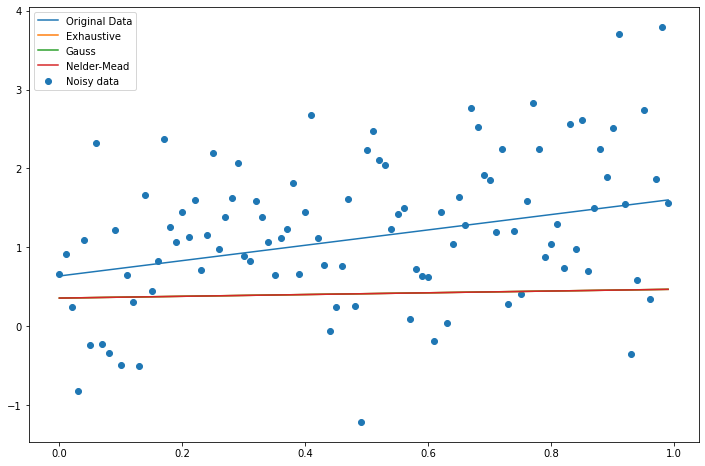

In [78]:
plt.figure(figsize=(12, 8))
plt.plot(x, y_clear)
plt.plot(x, numpy.array(res_linear_exhaustive[0]*x+res_linear_exhaustive[1]))
plt.plot(x, numpy.array(res_linear_gaus.x[0]*x+res_linear_gaus.x[1]))
plt.plot(x, numpy.array(res_linear_nm.x[0]*x+res_linear_nm.x[1]))
plt.scatter(x, y)
plt.legend(["Original Data","Exhaustive", "Gauss","Nelder-Mead","Noisy data"])
plt.show()

#### rational

In [100]:
parameters_rational=[]    

In [101]:
res_rational_exhaustive = optimize.brute(MLS_rational, [[0, 1], [0, 1]], args=(x,y), Ns=int(1/error) + 1,full_output=True)
res_rational_gaus = optimize.minimize(MLS_rational, [0, 0], args=(x,y), tol=error, method='Powell')
res_rational_nm = optimize.minimize(MLS_rational, [0, 0], args=(x,y), tol=error, method='Nelder-Mead')

In [102]:
parameters_rational.append([res_rational_exhaustive[0][0],res_rational_exhaustive[0][1],res_rational_exhaustive[1],0,0])
parameters_rational.append([res_rational_gaus.x[0],res_rational_gaus.x[1],res_rational_gaus.fun,res_rational_gaus.nfev,res_rational_gaus.nit])
parameters_rational.append([res_rational_nm.x[0],res_rational_nm.x[1],res_rational_nm.fun,res_rational_nm.nfev,res_rational_nm.nit])

In [103]:
parameters_rational[0].append(abs(alpha-parameters_rational[0][0]))
parameters_rational[0].append(abs(beta-parameters_rational[0][1]))
parameters_rational[1].append(abs(alpha-parameters_rational[1][0]))
parameters_rational[1].append(abs(beta-parameters_rational[1][1]))
parameters_rational[2].append(abs(alpha-parameters_rational[2][0]))
parameters_rational[2].append(abs(beta-parameters_rational[2][1]))

In [104]:
# Printing a table with results
rowIDs=['Exhaustive','Gauss ','Nelder-Mead']
print(tabulate(parameters_rational, headers=['a','b','function value','function claculation','num of iteration','precesion |a-alpha|','precesion |b-beta|'],numalign ='center',showindex=rowIDs))

                a          b       function value    function claculation    num of iteration    precesion |a-alpha|    precesion |b-beta|
-----------  --------  ---------  ----------------  ----------------------  ------------------  ---------------------  --------------------
Exhaustive   0.809792  -0.593067      76.1946                 0                     0                 0.162977               1.23167
Gauss        0.810824  -0.593408      76.1951                100                    4                 0.161945               1.23201
Nelder-Mead  0.810055  -0.59289       76.1946                124                    65                0.162714                1.2315


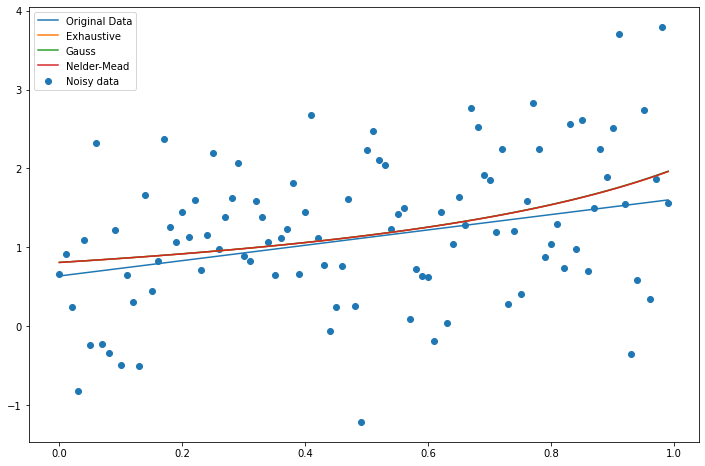

In [109]:
plt.figure(figsize=(12, 8))
plt.plot(x, y_clear)

plt.plot(x, numpy.array(res_rational_exhaustive[0][0]/(1+x*res_rational_exhaustive[0][1])))
plt.plot(x, numpy.array(res_rational_gaus.x[0]/(1+x*res_rational_gaus.x[1])))
plt.plot(x, numpy.array(res_rational_nm.x[0]/(1+x*res_rational_nm.x[1])))
plt.scatter(x, y)
plt.legend(["Original Data","Exhaustive", "Gauss","Nelder-Mead","Noisy data"])
plt.show()